#BASIC REGRESSION  scr.

#The python libraries required for this specific task are shown below

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

#This is how to open the data using pandas module and usecols is used to select specific columns you want to use.

In [2]:

df = pd.read_csv('/content/diabetes.csv', usecols = ['Glucose','Age', 'Outcome','BloodPressure'])


#     Uncommenting the code below allows you to visualize the last column "Outcome"

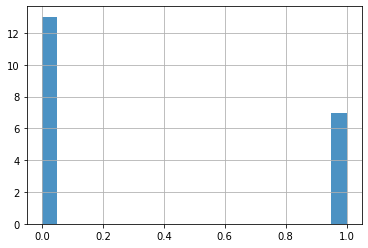

In [3]:
df[df.columns[-1]].hist(alpha=0.8, bins= 20, density=True)
plt.show()

# The .dropna() method is used to drop all the values with empty values before fitting the model 

In [4]:
df= df.dropna( subset=['Glucose','Age', 'Outcome','BloodPressure'])

# splitting the data into features(X) and Target(Y)

In [5]:
X = df[df.columns[:-1]].values
Y = df[[df.columns[-1]]].values

(array([[  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.],
        [ 35.,   4.,  82., 442., 189.,  15.,   1.,   0.,   0.,   0.],
        [  0., 561., 175.,  31.,   1.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 3 Lists of Patches objects>)

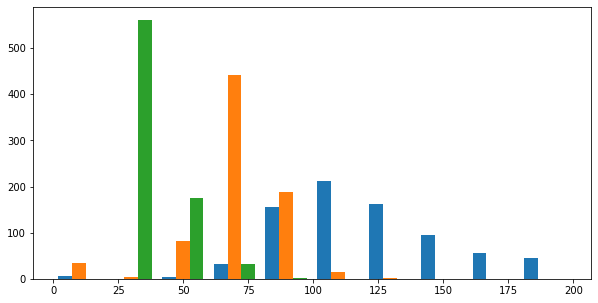

In [10]:
plt_1 = plt.figure(figsize=(10, 5))
plt.hist(X)

#instatiating the standard scale

In [11]:
scale = StandardScaler()

#overcome overfitting and get more accurate results.

In [12]:
scaled_x = scale.fit_transform(X)

# Splitting the the data into train and test sets.

In [13]:
x_test, x_train, y_test, y_train = train_test_split(scaled_x, Y, random_state=0, test_size = .75)



#Instatiating logistic regression

In [14]:
model = LogisticRegression() 

In [15]:
# .ravel method changes the shape of y to remove data conversion anormalies
model.fit(x_train,y_train.ravel())

LogisticRegression()

#Using the model to predict given our test data feature

In [16]:
predict_test = model.predict(x_test)
print("Evaluated test_predictions:", predict_test)

Evaluated test_predictions: [0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1]


#Determining an accuracy score of the model given our test target

accuracy_score on test dataset :  0.734375


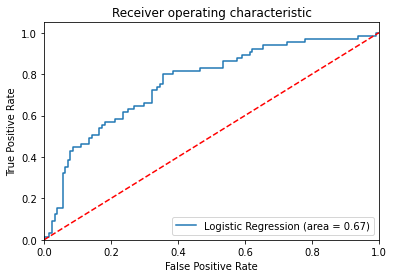

In [17]:

accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('ROC_curve')
plt.show()

#END!